<h1 style='color: #6a5acd; font-size: 34px; font-weight: bold;'>Exploração Biblioteca UFRN

</h1>


# <font color="#cda35a" style="font-size: 30px;">Objetivo</font>
<hr style="border: 2px solid #cda35a;">

 <p style='font-size: 23px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i><b> Explorar dos dados da biblioteca da UFRN, e responder algumas preguntas, como: A quantidade de empréstimos está aumentando ou diminuindo ao decorrer dos últimos anos? Em quais bibliotecas do sistema estão a maior quantidade de empréstimos?
Quais são os temas mais emprestados? E os menos? _______ e indentificar possíveis problemas e soluções </b></i>     
</p>

---

# <font color="#cda35a" style="font-size: 30px;">Roteiro</font>
<hr style="border: 2px solid #cda35a;">

<h1 style='color: black; font-size:22px; font-weight: bold;'> 1. Importação de dados
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'>2. Limpeza de dados

</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
3. Análise exploratória de dados e DateTime
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
4. Análise exploratória de dados e Variáveis categóricas
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
5. Análise exploratória de dados e Boxplot
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
6. JSON, Excel e Pivot_table
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
7. Customização de tabelas
</h1>

---

# <font color="#cda35a" style="font-size: 30px;">1. Importação de dados</font>
<hr style="border: 2px solid #cda35a;">

---
## <font color=#5abdcd style="font-size: 30px;">Unificar todos os arquivos em um único Dataframe</font>

---

In [532]:
#importando bibliotecas

import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

In [533]:
# Lista para armazenar os caminhos dos arquivos CSV
file_paths = [
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20101.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20102.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20111.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20112.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20121.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20122.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20131.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20132.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20141.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20142.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20151.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20152.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20161.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20162.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20171.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20172.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20181.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20182.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20191.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20192.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20201.csv")
]


# Lista para armazenar os DataFrames de cada arquivo
data_frames = []

# Iterar sobre os caminhos dos arquivos CSV
for file_path in file_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenar os DataFrames em um único DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)
combined_df.shape

(2258018, 7)

---
## <font color=#5abdcd style="font-size: 30px;">Limpando dados Nulos e Duplicatas</font>

---

In [534]:
# Remover linhas duplicadas
combined_df.drop_duplicates(inplace=True)

In [535]:
df_parquet = pd.read_parquet(os.path.join("Datasets", "dados_exemplares.parquet"))
df = combined_df.merge(df_parquet)
df.shape

(2072522, 13)

# <font color="#cda35a" style="font-size: 30px;">2. Limpeza de dados</font>
<hr style="border: 2px solid #cda35a;">

In [536]:
intervalos = {
    (0, 100): 'Generalidades',
    (100, 200): 'Filosofia e psicologia',
    (200, 300): 'Religião',
    (300, 400): 'Ciências sociais',
    (400, 500): 'Classe vaga',
    (500, 600): 'Matemática e ciências naturais',
    (600, 700): 'Ciências aplicadas',
    (700, 800): 'Belas artes',
    (800, 900): 'Linguagem',
    (900, float('inf')): 'Geografia. Biografia. História.'
}

CDU_lista = []
for CDU in df['localizacao']:
    categoria = next(value for (key_start, key_end), value in intervalos.items() if CDU >= key_start and CDU < key_end)
    CDU_lista.append(categoria)

df['CDU_geral'] = CDU_lista

In [537]:
df['matricula_ou_siape'] = df['matricula_ou_siape'].astype('string')

# <font color="#cda35a" style="font-size: 30px;">3. Análise exploratória de dados e DateTime </font>
<hr style="border: 2px solid #cda35a;">

In [538]:
df['data_emprestimo'] = pd.to_datetime(df['data_emprestimo'])

In [539]:
df['Ano_Emprestimo'] = df['data_emprestimo'].dt.year.astype(int)

total_por_ano = []
for ano in list(df['Ano_Emprestimo'].unique()):
    total = df.query("Ano_Emprestimo == @ano")['id_exemplar'].count()
    total_por_ano.append(total)
total_por_ano

[161394,
 196390,
 221365,
 234749,
 219189,
 213582,
 215900,
 218462,
 194080,
 171801,
 25610]

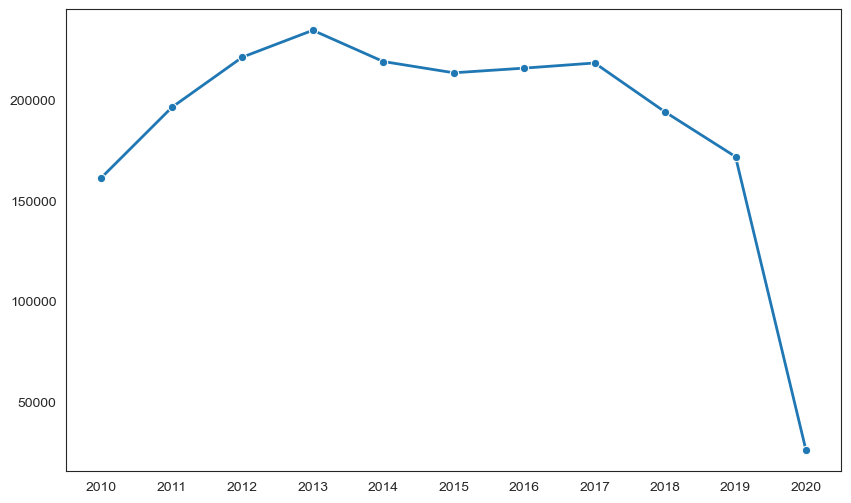

In [540]:
#Plotando o Gráfico

anos = list(df['Ano_Emprestimo'].unique())

# Remover Bordas 
sns.set_style("white")


plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=anos, y=total_por_ano, lw=2, marker='o')

# Label x
plt.xticks(anos)



plt.show()

---
# <font color=#5abdcd style="font-size: 30px;">Análise do Gráfico</font>
<hr style="border: 2px solid #5abdcd;">


### <font color=#5abdcd style="font-size: 30px;">Houve uma grande queda no ano da pandemia</font>
### <font color=#5abdcd style="font-size: 30px;">declínio de 2013 a 2015</font>
### <font color=#5abdcd style="font-size: 30px;">depois de um avanço em 2015 voltou a cair</font>

---

In [541]:
#separando os meses
df['mes_emprestimo'] = df['data_emprestimo'].dt.month.astype(int)

#contando quantos empréstimos por mês
filmes_por_mes = df.groupby('mes_emprestimo')['id_exemplar'].count()


# Renomeando os meses
dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}
filmes_por_mes.index = filmes_por_mes.index.map(dicionario_meses)

filmes_por_mes = filmes_por_mes.to_frame()
filmes_por_mes.index.name = 'mes'
filmes_por_mes.columns = ['quantidade']
filmes_por_mes

,quantidade
mes,
Jan,67514
Fev,210200
Mar,252185
Abr,208725
Mai,202530
Jun,138123
Jul,123790
Ago,232793
Set,208234


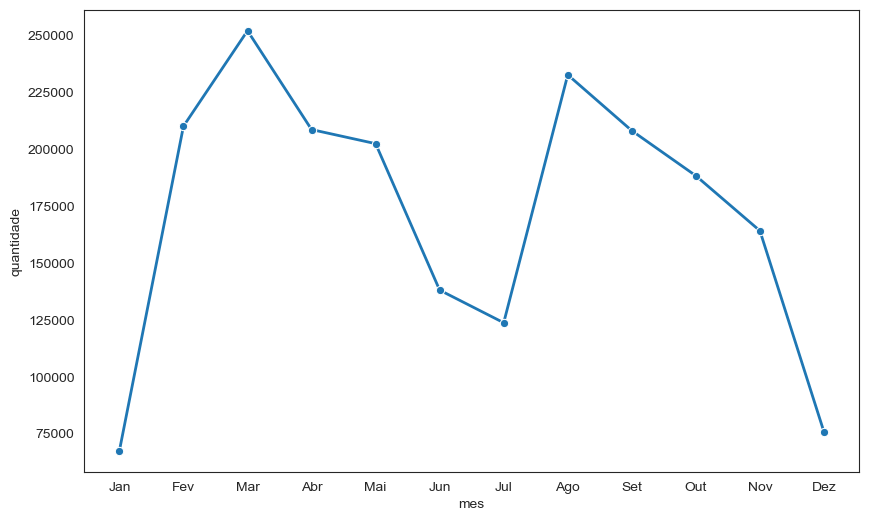

In [542]:
#Plotando o Gráfico

#anos = list(df['Ano_Emprestimo'].unique())

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=filmes_por_mes.index, y=filmes_por_mes['quantidade'], lw=2, marker='o')

plt.show()

---
# <font color=#5abdcd style="font-size: 30px;">Análise do Gráfico</font>
<hr style="border: 2px solid #5abdcd;">


### <font color=#5abdcd style="font-size: 30px;">os meses de Janeiro, Junho e Dezembro são os menos movimentados, normalmente meses de férias</font>
### <font color=#5abdcd style="font-size: 30px;">meses mais ativos (fevereiro e agosto)</font>
### <font color=#5abdcd style="font-size: 30px;">no meses de pouco movimento pode-ser incluir férias para a maioria dos colaboradores.</font>

---

In [543]:
#separando os horários
df['hora_emprestimo'] = df['data_emprestimo'].dt.hour.astype(int)

#contando quantos empréstimos por hora
filmes_por_hora = df.groupby('hora_emprestimo')['id_exemplar'].count()

# Tabela com o movimento em cada horário 
filmes_por_hora = filmes_por_hora.to_frame()
filmes_por_hora.index.name = 'Hora'
filmes_por_hora.columns = ['quantidade']
filmes_por_hora.sort_values(by='quantidade', ascending=False)

,quantidade
Hora,
16,210655
10,185839
17,185340
18,182520
11,180048
15,166672
14,150876
12,148754
9,131273


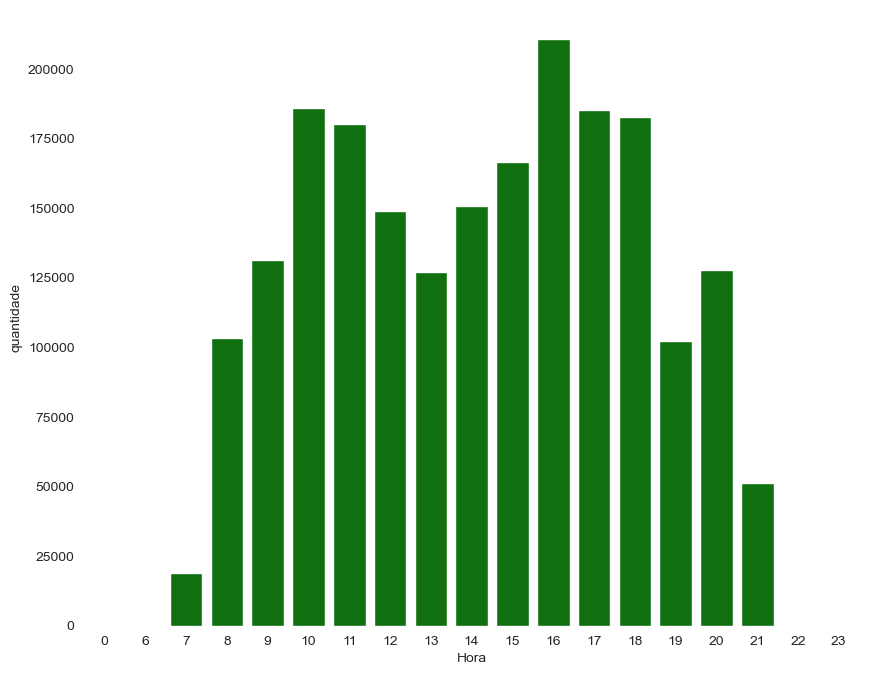

In [544]:
#plotando gráfico de barras

plt.figure(figsize=(10,8))

ax = sns.barplot(x= filmes_por_hora.index, y =filmes_por_hora['quantidade'], color = 'Green')

# Remover borda externa
sns.despine(left=True, right=True, top=True, bottom=True)

---
# <font color=#5abdcd style="font-size: 30px;">Análise do Gráfico</font>
<hr style="border: 2px solid #5abdcd;">


## <font color=#5abdcd style="font-size: 30px;">quais seriam os melhores horários para alocar as demais atividades que não sejam de atendimento ao usuário:</font>
# > <font color=#5abdcd style="font-size: 30px;">Até as 7 horas da manhã o movimento é baixo.</font>
# > <font color=#5abdcd style="font-size: 30px;">Das 21 horas em diante.</font>

---

# <font color="#cda35a" style="font-size: 30px;">4. Análise exploratória de dados e Variáveis categóricas</font>
<hr style="border: 2px solid #cda35a;">

---
## <font color=#5abdcd style="font-size: 30px;">O objetivo será entender a quantidade de empréstimos a partir das variáveis categóricas do conjunto de dados.</font>

---

Tipo de vínculo
Coleção
Biblioteca
Classificação geral da CDU

---

De quais temas da CDU são os exemplares emprestados?


---


Gere uma tabela de frequência e com o percentual para cada variável.

In [545]:
#Qual são os valores únicos de nossas variáveis categóricas

for i in ['tipo_vinculo_usuario', 'colecao', 'biblioteca', 'CDU_geral']:
    print(df[i].unique(),'\n')   

['ALUNO DE GRADUAÇÃO' 'ALUNO DE PÓS-GRADUAÇÃO' 'DOCENTE' 'DOCENTE EXTERNO'
 'SERVIDOR TÉCNICO-ADMINISTRATIVO' 'ALUNO MÉDIO/TÉCNICO' 'USUÁRIO EXTERNO'
 'OUTROS'] 

['Acervo Circulante' 'Folhetos' 'Teses' 'Dissertações' 'Monografias'
 'Publicações de Autores do RN' 'Publicações da UFRN' 'Multimeios'
 'Coleção Mossoroense' 'Eventos' 'Trabalho Acadêmico'
 'Obras de Referência' 'Obras Raras' 'Literatura de Cordel'
 'Coleção Zila Mamede' 'Necessidades Educacionais Específicas'] 

['Biblioteca Central Zila Mamede'
 'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba'
 'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN'
 'Biblioteca Setorial do Centro Ciências da Saúde - CCS'
 'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia'
 'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET'
 'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA'
 'Biblioteca Setorial Prof. Horác

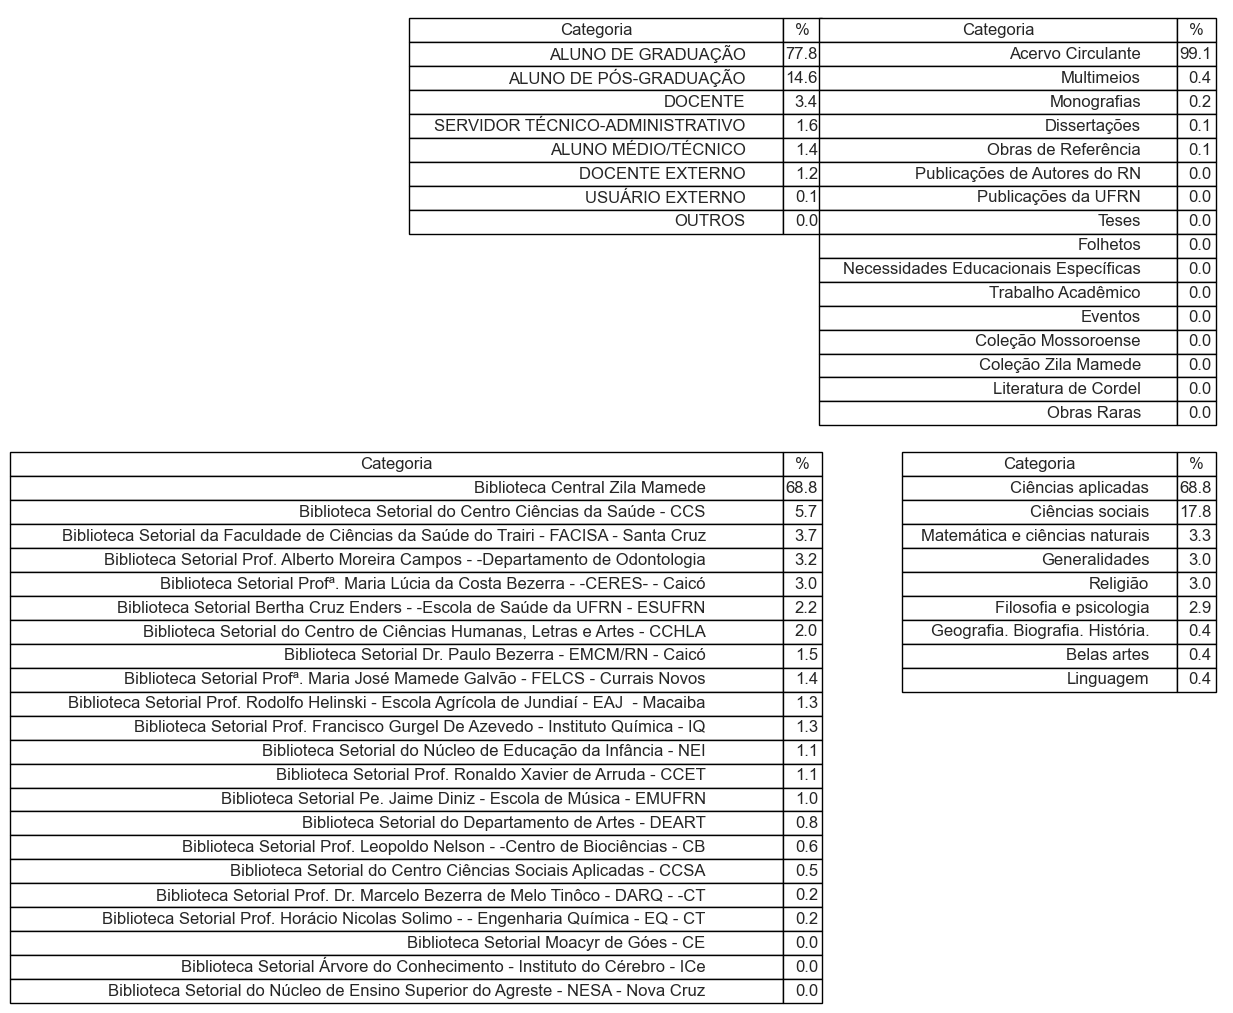

In [546]:
plt.figure(figsize=(12, 10))

lista = ['tipo_vinculo_usuario', 'colecao', 'biblioteca', 'CDU_geral']

num_rows = 2  # Número de linhas de subplots
num_cols = 2  # Número de colunas de subplots

for idx, col in enumerate(lista):
    total = df[col].value_counts().sum()
    percentage = ((df[col].value_counts() * 100) / total).round(1)
    
    ax = plt.subplot(num_rows, num_cols, idx + 1)
    ax.axis('off')  # Remover eixo para mostrar apenas a tabela
    
    # Criar a tabela de frequência
    tab_data = []
    for index, value in percentage.items():
        tab_data.append([index, value])
    tab = ax.table(cellText=tab_data, colLabels=['Categoria', '%'], loc='upper right')
    tab.auto_set_font_size(False)
    tab.set_fontsize(12)
    tab.scale(1.2, 1.2)
    tab.auto_set_column_width([0, 1])  # Ajustar largura das colunas
    
plt.tight_layout()
plt.show()


---

## <font color=#5abdcd style="font-size: 25px;">Como se distribuem os empréstimos de exemplares pelos tipos de vínculo dos usuários?.</font>

---

> <font color='black' style="font-size: 15px;">Em torno de 80% dos alunos que fazem empréstimos são da graduação, seguidos dos de pós graduação. Indicando que muito provavelmente livros da ementas dos cursos de graduação são os mais requisitados.</font>

> <font color='black' style="font-size: 15px;">Possíveis causas: Maior número de alunos de graduação em relação a outros, Uma maior dependência dos alunos de Graduação a biblioteca para possuir os livros necessários para o estudo</font>
---
## <font color=#5abdcd style="font-size: 30px;">Quais coleções são mais emprestadas?</font>

---

> <font color='black' style="font-size: 15px;">Em torno de 99% das coleções Acervo Circulante, seguidos de Multimeios e Monografias.</font>

> <font color='black' style="font-size: 15px;">Possíveis causas: Pouca categorização dos exemplares, sendo acervo circulante um termo genérico, mas também buscar entender essa diferença tão grande para outras coleções muito importantes (monografias, dissertações e teses)</font>

---
## <font color=#5abdcd style="font-size: 30px;">Quais são as bibliotecas com mais ou menos quantidade de empréstimos?</font>

---

> <font color='black' style="font-size: 15px;">Em torno de 68% dos empréstimos ocorrem Biblioteca Central Zila Mamede, que fica na Universidade pública em Natal, Rio Grande do Norte. Em seguida a Biblioteca Setorial do Centro Ciências da Saúde - CCS com 6%.</font>

> <font color='black' style="font-size: 15px;">Possíveis causas: Como e onde foi feita a amostragem do dataframe, localização das bibliotecas (se estão em grandes centros ou não) ou até mesmo alguma questão de desempenho interno dessas bibliotecas, se elas possum um bom acervo, um bom atendimento.</font>

---
## <font color=#5abdcd style="font-size: 30px;">De quais temas da CDU são os exemplares emprestados?</font>

---

> <font color='black' style="font-size: 15px;">De forma ampla, é evidente que existe uma notável disparidade entre os assuntos em análise. Será de relevância compreender o motivo pelo qual os conteúdos abordando Geografia/Biografia/História, Belas Artes e Linguagem apresentam números tão diminutos.)</font>

# <font color="#cda35a" style="font-size: 30px;">5. Análise exploratória de dados e Boxplot</font>
<hr style="border: 2px solid #cda35a;">

---
## <font color=#5abdcd style="font-size: 30px;">avaliar dentre os alunos de graduação e pós graduação a distribuição de empréstimos mensais por ano realizados entre 2010 e 2020 da coleção que tiver a maior frequência de empréstimos.</font>

---

In [547]:
alunos_graduacao = df.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
alunos_graduacao_acervo_circulante = alunos_graduacao.query('colecao == "Acervo Circulante"')
alunos_graduação_num_emprestimos = alunos_graduacao_acervo_circulante[['Ano_Emprestimo', 'mes_emprestimo']].value_counts().to_frame().reset_index()

In [548]:
alunos_graduação_num_emprestimos.rename(columns={0: 'quantidade'}, inplace=True)
alunos_graduação_num_emprestimos

,Ano_Emprestimo,mes_emprestimo,quantidade
0,2012,3,22797
1,2015,3,22483
2,2013,4,21853
3,2017,3,21735
4,2016,3,21692
...,...,...,...
118,2016,1,2670
119,2019,1,2276
120,2019,12,1980
121,2020,1,1781


Text(0, 0.5, 'Quantidade')

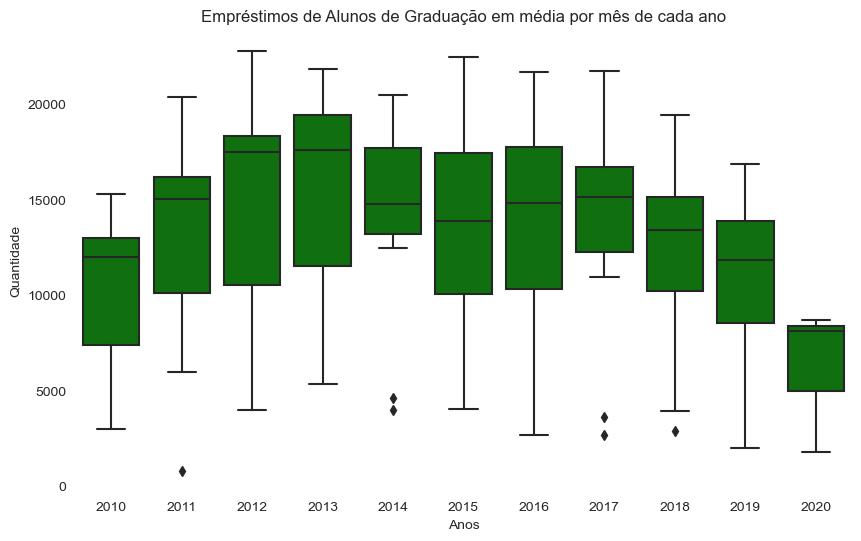

In [549]:
# gerando gráfico boxplot


plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Ano_Emprestimo', y='quantidade', data=alunos_graduação_num_emprestimos, color='green')
sns.despine(left=True, right=True, top=True, bottom=True)

plt.title("Empréstimos de Alunos de Graduação em média por mês de cada ano")
plt.xlabel("Anos")
plt.ylabel("Quantidade")

In [550]:
alunos_pos_graduacao = df.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao.query('colecao == "Acervo Circulante"')
alunos_pos_graduação_num_emprestimos = alunos_pos_graduacao_acervo_circulante[['Ano_Emprestimo', 'mes_emprestimo']].value_counts().to_frame().reset_index()

In [551]:
alunos_pos_graduação_num_emprestimos.rename(columns={0: 'quantidade'}, inplace=True)
alunos_pos_graduação_num_emprestimos

,Ano_Emprestimo,mes_emprestimo,quantidade
0,2015,3,3927
1,2017,8,3837
2,2017,3,3722
3,2016,3,3711
4,2016,8,3662
...,...,...,...
119,2020,1,1143
120,2010,1,1105
121,2019,12,1069
122,2011,1,465


Text(0, 0.5, 'Quantidade')

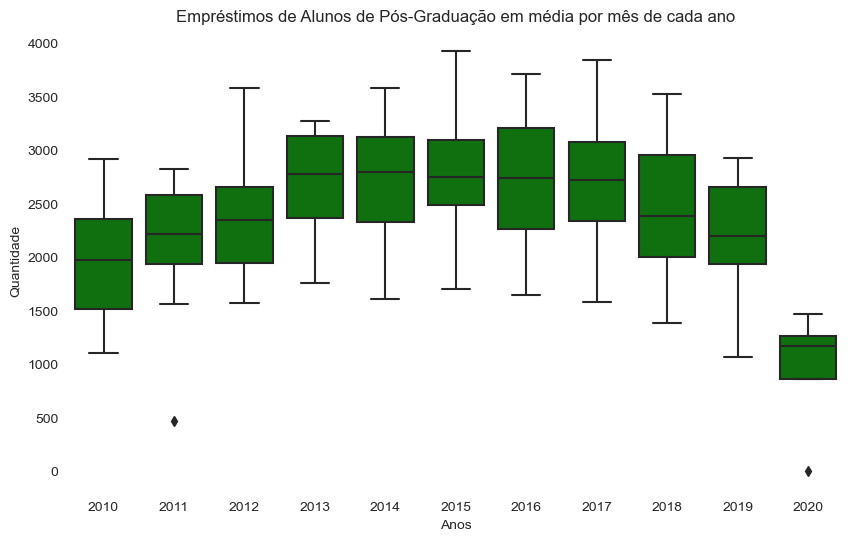

In [552]:
# gerando gráfico boxplot


plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Ano_Emprestimo', y='quantidade', data=alunos_pos_graduação_num_emprestimos, color='green')
sns.despine(left=True, right=True, top=True, bottom=True)

plt.title("Empréstimos de Alunos de Pós-Graduação em média por mês de cada ano")
plt.xlabel("Anos")
plt.ylabel("Quantidade")

## <font color=#5abdcd style="font-size: 25px;">Comentários: Alunos de Graduação</font>

---

> <font color='black' style="font-size: 15px;">Assim como foi possível notar no gráfico de linhas, que englobava todos os dados, notamos um crescimento dos empréstimos de 2010 a 2013. Os anos de 2014 e 2017 são parecidos em aspectos representativos, e também simbolizam anos de queda após um período de elevação. Em 2020 podemos notar os efeitos da pandemia nos empréstimos</font>


---
## <font color=#5abdcd style="font-size: 25px;">Comentários: Alunos de Pós-Graduação</font>

---

> <font color='black' style="font-size: 15px;">Interessante notar que algumas tendências de repetem (como a elevação em até 2013 e queda em 2014). O que pode sinalizar que o motivo da queda não está relacionado ao tipo de vínculo. É possível verificar também uma variação cada vez menor entre os valores dos quartis, significando um padrão mais estável de empréstimos ao longo do ano </font>



---

In [553]:
#resetando index df
df.index = (range(len(df)))
df.shape

(2072522, 17)

# <font color="#cda35a" style="font-size: 30px;">6. JSON, Excel e Pivot_table</font>
<hr style="border: 2px solid #cda35a;">

Olá, Miguel Freire. Tudo bem?

Você já está chegando na reta final do #7DaysOfCode!

Hoje, você terá mais dados para enriquecer as suas análises.

As instituições de ensino superior (IES) têm a necessidade de passar por avaliações do Ministério da Educação (MEC) para que possam ofertar e continuar ofertando cursos de graduação e pós-graduação.

A biblioteca universitária faz parte de um dos indicadores da avaliação dos cursos, em principalmente três aspectos: acervo, infraestrutura e serviços.

Dentre os serviços, são avaliados se existem recursos de bases referenciais para pesquisa, se há treinamentos para os usuários utilizarem os materiais, e a presença de indicadores sobre o uso dos materiais do acervo (empréstimos, consultas) dentre outros tópicos.

Durante meu trabalho como bibliotecário universitário, eu já passei por esta experiência, e um dos indicadores enviados foi a quantidade de empréstimos realizados nos últimos anos pelos cursos que seriam avaliados.

Por este motivo, no desafio de hoje, você precisará de novas métricas em relação aos empréstimos, de acordo com os cursos.

Você precisará calcular a quantidade de empréstimos realizados entre 2015 e 2020 por cada curso de graduação que passará pela avaliação.

Os cursos serão:

Biblioteconomia
Ciências sociais
Comunicação social
Direito
Filosofia
Pedagogia

A universidade forneceu os dados dos usuários, mas uma parte deles está em planilhas de Excel, a outra parte veio através de uma API do sistema em formato JSON.

Extraia os dados destes arquivos, agrupe-os em apenas um só, e verifique depois a quantidade de empréstimos.

Gere uma tabela com as seguintes características:

Índice: Cursos
Colunas: Ano
Valores: Quantidade de empréstimos
Total: Acrescente uma linha e uma coluna de total a tabela


---
## <font color=#5abdcd style="font-size: 30px;">Criando dataframe excel</font>

---

In [554]:
#Importando os dados do excel

path = os.path.join("Datasets", "matricula_alunos.xlsx")
df_excel_ate_2010 = pd.read_excel(path, sheet_name='Até 2010',skiprows=1)
df_excel_apos_2010 = pd.read_excel(path, sheet_name='Após 2010',skiprows=1)


df_excel_ate_2010.columns, df_excel_apos_2010.columns =  ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso'], ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
display(df_excel_ate_2010)
display(df_excel_apos_2010)

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,1.900017e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,1.990145e+08,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,1.997357e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,1.998124e+08,ALUNO DE GRADUAÇÃO,LETRAS
4,1.998237e+08,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7721,2.009075e+09,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7722,2.009075e+09,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7723,2.009075e+09,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7724,2.009075e+09,ALUNO DE GRADUAÇÃO,MÚSICA


,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2.010000e+09,ALUNO DE GRADUAÇÃO,DIREITO
1,2.010000e+09,ALUNO DE GRADUAÇÃO,AGRONOMIA
2,2.010001e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
3,2.010003e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
4,2.010003e+09,ALUNO DE GRADUAÇÃO,GEOGRAFIA
...,...,...,...
2269,2.015012e+10,ALUNO DE GRADUAÇÃO,LETRAS
2270,2.015075e+09,ALUNO DE GRADUAÇÃO,DANÇA
2271,2.016000e+10,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2272,2.017009e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [555]:
# Unindo os cadastros excel

df_excel_final = pd.concat([df_excel_ate_2010,df_excel_apos_2010],ignore_index=True)
df_excel_final

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,1.900017e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,1.990145e+08,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,1.997357e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,1.998124e+08,ALUNO DE GRADUAÇÃO,LETRAS
4,1.998237e+08,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
9995,2.015012e+10,ALUNO DE GRADUAÇÃO,LETRAS
9996,2.015075e+09,ALUNO DE GRADUAÇÃO,DANÇA
9997,2.016000e+10,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
9998,2.017009e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [556]:
display(type(df_excel_final.matricula_ou_siape[0]))
display(type(df.matricula_ou_siape[0]))

#deixando o mesmo tipo
df_excel_final.matricula_ou_siape = df_excel_final.matricula_ou_siape.astype('string')

numpy.float64

str


---
## <font color=#5abdcd style="font-size: 30px;">Criando dataframe JSON</font>

---

In [584]:

# Carregar os dados JSON
df_json = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Python+Pandas+6%2F7%3A+%F0%9F%91%A9%F0%9F%8F%BD%E2%80%8D%F0%9F%92%BB+JSON%2C+Excel+e+Pivot_table&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Python+Pandas+-+1%C2%AA+Ed+%29+6%2F7')

#graduação
df_json_graduacao = pd.read_json(df_json.registros[0])

# Pós-graduacao
df_json_pos_graduacao = pd.read_json(df_json.registros[1])

# Ajustando o tipo de objeto da coluna matricula
df_json_graduacao.matricula_ou_siape = df_json_graduacao.matricula_ou_siape.astype('float')
df_json_graduacao.matricula_ou_siape = df_json_graduacao.matricula_ou_siape.astype('string')

---
## <font color=#5abdcd style="font-size: 30px;">Unindo dataframes excel e json</font>

---

In [585]:
df_concat_json_excel = pd.concat([df_json_graduacao, df_excel_final], ignore_index=True)
df_concat_json_excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003.0,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346.0,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572.0,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
72797,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
72798,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
72799,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
72800,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


---
## <font color=#5abdcd style="font-size: 30px;">Empréstimos de 2015 até 2020</font>

---

In [586]:
matricula_emprestimo = df.query("tipo_vinculo_usuario == 'ALUNO DE GRADUAÇÃO' and Ano_Emprestimo >= 2015")[['matricula_ou_siape','Ano_Emprestimo']].reset_index(drop=True)
matricula_emprestimo.shape

(788104, 2)

In [587]:
#verificar valores nulos

matricula_emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788104 entries, 0 to 788103
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   matricula_ou_siape  788010 non-null  string
 1   Ano_Emprestimo      788104 non-null  int32 
dtypes: int32(1), string(1)
memory usage: 9.0 MB


In [588]:
matricula_emprestimo = matricula_emprestimo.dropna()
matricula_emprestimo.shape

(788010, 2)

---
## <font color=#5abdcd style="font-size: 30px;">Cursos que serão analisados: Biblioteconomia, Ciências sociais, Comunicação social, Direito, Filosofia, Pedagogia </font>

---

In [589]:
alunos_cursos = df_concat_json_excel.query("curso == ['BIBLIOTECONOMIA','CIÊNCIAS SOCIAIS','COMUNICAÇÃO SOCIAL','DIREITO','FILOSOFIA','PEDAGOGIA']")
alunos_cursos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003.0,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346.0,ALUNO DE GRADUAÇÃO,DIREITO
5,200604856.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
9,200711601.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
10,2008016110.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
...,...,...,...
72775,2011087766.0,ALUNO DE GRADUAÇÃO,COMUNICAÇÃO SOCIAL
72789,2013005750.0,ALUNO DE GRADUAÇÃO,DIREITO
72790,2013008037.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72795,2014079614.0,ALUNO DE GRADUAÇÃO,DIREITO


---
## <font color=#5abdcd style="font-size: 30px;">Unir dataframes</font>

---

In [590]:
alunos_cursos = matricula_emprestimo.merge(alunos_cursos)
alunos_cursos

,matricula_ou_siape,Ano_Emprestimo,tipo_vinculo_usuario,curso
0,20180154181.0,2018,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
1,20180154181.0,2020,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
2,20180154181.0,2018,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
3,20180154181.0,2018,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
4,20180154181.0,2018,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...,...
212833,20200023906.0,2020,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
212834,20190121101.0,2020,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
212835,20200144278.0,2020,ALUNO DE GRADUAÇÃO,PEDAGOGIA
212836,20190067212.0,2020,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS


In [597]:
emprestimos_alunos_final = alunos_cursos.iloc[:,[1,3]].value_counts().reset_index()
emprestimos_alunos_final.columns = ['ANO','CURSO','QUANTIDADE_EMPRESTIMOS']
emprestimos_alunos_final

,ANO,CURSO,QUANTIDADE_EMPRESTIMOS
0,2017,COMUNICAÇÃO SOCIAL,8253
1,2016,COMUNICAÇÃO SOCIAL,7973
2,2017,DIREITO,7885
3,2015,BIBLIOTECONOMIA,7784
4,2015,DIREITO,7665
5,2016,FILOSOFIA,7576
6,2015,CIÊNCIAS SOCIAIS,7489
7,2017,PEDAGOGIA,7434
8,2017,FILOSOFIA,7389
9,2016,DIREITO,7363


---
## <font color=#5abdcd style="font-size: 30px;">Pivot_table</font>

---

In [600]:
emprestimos_alunos_final_tabela = emprestimos_alunos_final.pivot_table(index='CURSO', columns='ANO', values='QUANTIDADE_EMPRESTIMOS',
                                            aggfunc='sum', margins=True, margins_name='TOTAL')
emprestimos_alunos_final_tabela

ANO,2015,2016,2017,2018,2019,2020,TOTAL
CURSO,,,,,,,
BIBLIOTECONOMIA,7784,7044,7307,6378,5889,900,35302
CIÊNCIAS SOCIAIS,7489,6978,6918,6181,5788,825,34179
COMUNICAÇÃO SOCIAL,7147,7973,8253,6953,5885,796,37007
DIREITO,7665,7363,7885,7027,5861,905,36706
FILOSOFIA,6950,7576,7389,6296,5572,832,34615
PEDAGOGIA,7189,7153,7434,6518,5869,866,35029
TOTAL,44224,44087,45186,39353,34864,5124,212838
